#### 1) The base file was given in which the data was converted in discrete data so, code is done according to discrete data

#### 2) Implemented Decision Tree without use of Classes As they were not necessary

In [140]:
from sklearn import datasets
import pandas as pd
import math

## Loading data and converting continuous values into discrete values 

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data)
df.columns = ["sl", "sw", 'pl', 'pw']

In [11]:
#Function to find label for a value
#if MIN_Value <=val < (m + Mean_Value) / 2 then it is assigned label a
#if (m + Mean_Value) <=val < Mean_Value then it is assigned label b
#if (Mean_Value) <=val < (Mean_Value + MAX_Value)/2 then it is assigned label c
#if (Mean_Value + MAX_Value)/2 <=val <= MAX_Value  then it is assigned label d

def label(val, *boundaries):
    if (val < boundaries[0]):
        return 'a'
    elif (val < boundaries[1]):
        return 'b'
    elif (val < boundaries[2]):
        return 'c'
    else:
        return 'd'

#Function to convert a continuous data into labelled data
#There are 4 lables  - a, b, c, d
def toLabel(df, old_feature_name):
    second = df[old_feature_name].mean()
    minimum = df[old_feature_name].min()
    first = (minimum + second)/2
    maximum = df[old_feature_name].max()
    third = (maximum + second)/2
    return df[old_feature_name].apply(label, args= (first, second, third))

In [12]:
#Convert all columns to labelled data
df['sl_labeled'] = toLabel(df, 'sl')
df['sw_labeled'] = toLabel(df, 'sw')
df['pl_labeled'] = toLabel(df, 'pl')
df['pw_labeled'] = toLabel(df, 'pw')
df

,sl,sw,pl,pw,sl_labeled,sw_labeled,pl_labeled,pw_labeled
0,5.1,3.5,1.4,0.2,b,c,a,a
1,4.9,3.0,1.4,0.2,a,b,a,a
2,4.7,3.2,1.3,0.2,a,c,a,a
3,4.6,3.1,1.5,0.2,a,c,a,a
4,5.0,3.6,1.4,0.2,a,c,a,a
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,c,b,c,d
146,6.3,2.5,5.0,1.9,c,a,c,d
147,6.5,3.0,5.2,2.0,c,b,c,d
148,6.2,3.4,5.4,2.3,c,c,d,d


In [13]:
df.drop(['sl', 'sw', 'pl', 'pw'], axis = 1, inplace = True)

In [14]:
set(df['sl_labeled'])

{'a', 'b', 'c', 'd'}

## Entropy Function

In [134]:
#Calculating the entropy in this function 
def entropy(y) :
    
    total_ele = len(y)  # taking length of target or say Y data 
    entropy_value = 0   # taking entropy as 0 initially
    
    for i in set(y[0]) :  # iterating over distinct labels present in Y
        count_of_class = len(y[y[0] == i])  # counting occurence of 1 label in Y data 
        prob = count_of_class/total_ele     # finding probability
        entropy_value += prob * math.log(prob, 2)  # adding it to total entropy  
        
    entropy_value = -entropy_value
    
    return entropy_value

## Information Gain Function 

In [135]:
def find_info_gain(x, y, feature) :
    
    parent_entropy = entropy(y)  # calculating entropy of Y 
    total_ele = len(y)   # to get the count of number of labels present in Y data
    weighted_entropy = 0  # initiating weighted average = 0 
    
    val = set(x[feature])  # taking in account each unique label
    
    # iterating to get weighted entropies of each child and add them 
    for i in val :
        child = y[(x[feature] == i)]
        i_entropy = entropy(child)
        
        weighted_entropy += (i_entropy * len(child)) / total_ele
        
    #finding info gain
    info_gain = parent_entropy - weighted_entropy  
    return info_gain

## Split Info function

In [136]:
# finding split info these two will help us in calculating gain ratio 
def split_information(x, y, feature) :
    total_ele = len(y)
    weighted_avg = 0
    val = set(x[feature]) # unique values in each feature
    
    for i in val : # taking 1 child at a time 
        
        child = y[x[feature] == i] # taking values of Y where feature is i 
                
        weighted_avg += (len(child) / total_ele) * math.log((len(child) / total_ele), 2) ## calculating weighted average here
        
    return -1 * weighted_avg

## Best feature and Maximum Gain Function

In [137]:
def find_best_feature(x, y , features) :
    best_feature = ''  # initiating best_feature as " "
    max_gain = -1  # initiating max_gain as -1
    
    # traversing all features
    for i in features :
        
        # finding split info and info_gain by calling these functions
        split_info = split_information(x, y, i)
        info_gain = find_info_gain(x, y, i)
        
        if split_info != 0 :
            gain_ratio = info_gain / split_info
            
        else :
            gain_ratio = -1
        
        # getting best feature and best gain ratio
        if gain_ratio > max_gain :
            best_feature = i
            max_gain = gain_ratio
            
    return best_feature, max_gain

## Function for Decision Tree or say base function for our decision tree 

In [139]:
def D_T(X,Y,features,level):     # this function is base function for Decision Tree 
    classes=set(Y[0])               # take all the unique labels present in Y 
    
    # now we will see all the cases and find out whether we can split our tree or not and whether the node is leaf or not 
    # case 1 
    if (len(classes) == 1):     # see if the length of classes is 1 or not 
        
            
        print("Level ",level)   # now we will print the current level as we don't have further classes we've reached the leaf node 
        current_class = list(classes)[0]    # current class will be our class at 0th position (although length is 1 but we are doing this to select the class) 
        
        print("Count of ",current_class," = ",len(Y))     # now we are printing the class and its count 
        print("Current Entropy is = 0.0")                 # Entropy is 0 as class will be pure and hence no randomness 
        print("Reached leaf Node")                        # we have only 1 class so we are at leaf node  
        print("Output Class Name =", current_class)
        print()
        return
   
    # case 2
    elif len(features)==0:                                 # checking if the count of features is 0 or not                           
        print("Level  ",level)                             # if feature is 0 that means we can't split further so we are just printing the level 
        
        #finding count of each output class
        for current_class in classes:
            count_of_current_class = (Y[0] == current_class).sum() 
            print("Count of ",current_class," = ",count_of_current_class) 
            
        #printing as we did in above case and it can be understood easily what we are doing 
        entropy_current = entropy(Y)
        
        print("Current Entropy is = ",entropy_current)
        print("No more features left")
        print("Reached leaf Node")
        print("Output Class Name =", current_class)
        print()
        return
    
    # case 3
    elif ((find_best_feature(X,Y,features))[0] == ''):     # I know this case is not that necessary but we are taking it to avoid errors so we are checking if best_feature is -1 as you can see in best_feature function it states that there is no feature as the value is still -1 
        print("Level  ",level)                             # printing the current level as we can't split further
        
        #Get count of each output class
        for i in classes:
            j = (Y[0]==i).sum()
            print("Count of ",i," = ",j)
            
        #finding class with majority and its entropy
        
        entropy_current = entropy(Y)
        
        print("Current Entropy is =",entropy_current)
        print("No more features left")
        print("Reached leaf Node")
        print("Output Class Name =", current_class)
        print()
        return
    
    # case 4 when we don't have a leaf node and feature count is not 0 and count of classes is not 1 
    else:
        print("Level ",level)        # printing the current level 
        
        max_count = 0
        for i in classes:            # iterating over classes that is labels in Y 
            j = (Y[0]==i).sum()         # taking sum of all the ith label in Y data that is calculating its count (in Y )
            print("Count of ",i," = ",j)       # printing the class and its count 
            
            if j >= max_count :
                max_count = j
                output_class  = i
                
        #entropy of Current Node
        print("Current Entropy is =",entropy(Y))
        
        #getting best feature to split and its gain ratio
        best_feature,gain_ratio = find_best_feature(X,Y,features)
        print("Splitting on feature ",best_feature,"with gain ratio :",gain_ratio)
        print("Output Class Name =", output_class)
        print()
        
        #splitting current node on all different values the best feature can have and recursively calling DT on each split
        diff_val_of_best_feat = set(X[best_feature]) # get different values of the BEST Feature in current data
        
        #traverse each feature value , split on each 
        for current in diff_val_of_best_feat:
            
            x=X[(X[best_feature] == current)]
            y=Y[(X[best_feature] == current)]

            # also we are deleting features when a split has been called on it 
            #recursion
            remaining_features = features - {best_feature}
            
            D_T(x,y,remaining_features,level+1)
        return

## Calling Decision Tree

In [138]:
y = pd.DataFrame(iris.target)
y[y[0] == 0] = 'setosa'
y[y[0] == 1] = 'versicolor'
y[y[0] == 2] = 'virginica'
unused_features = set(df.columns)
D_T(df, y, unused_features, 0)

Level  0
Count of  virginica  =  50
Count of  versicolor  =  50
Count of  setosa  =  50
Current Entropy is = 1.584962500721156
Splitting on feature  pw_labeled with gain ratio : 0.699638203622209
Output Class Name = setosa

Level  1
Count of  virginica  =  16
Count of  versicolor  =  40
Current Entropy is = 0.863120568566631
Splitting on feature  pl_labeled with gain ratio : 0.4334099495621066
Output Class Name = versicolor

Level  2
Count of  virginica  =  8
Count of  versicolor  =  39
Current Entropy is = 0.6581912658132185
Splitting on feature  sl_labeled with gain ratio : 0.12674503775809332
Output Class Name = versicolor

Level  3
Count of  virginica  =  7
Count of  versicolor  =  23
Current Entropy is = 0.783776947484701
Splitting on feature  sw_labeled with gain ratio : 0.07092036405148876
Output Class Name = versicolor

Level  4
Count of  versicolor  =  6
Current Entropy is = 0.0
Reached leaf Node
Output Class Name = versicolor

Level   4
Count of  virginica  =  6
Count of  ver

## Creating a Decision Tree by Inbuilt Classifier in Sklearn

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus

In [132]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

C:\Users\NIKUNJ\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


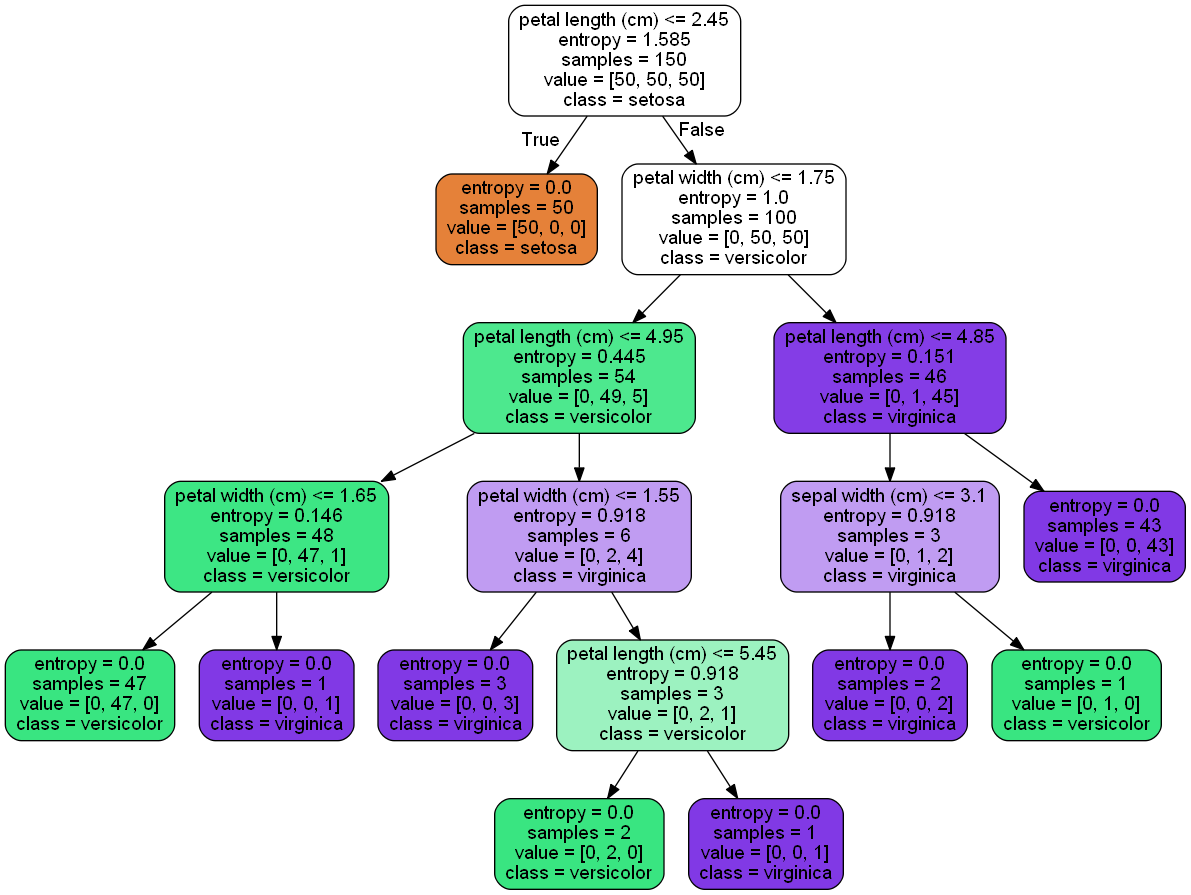

In [133]:
#Printing the decision tree formed using pydotplus 
from sklearn.externals.six import StringIO  
from IPython.display import Image  

dot_data = StringIO() 
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,feature_names=iris.feature_names,class_names=iris.target_names) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png()) 